In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df=pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t', quoting=3)
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [7]:
df.isnull().sum()

Review    0
Liked     0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017435C895C0>]],
      dtype=object)

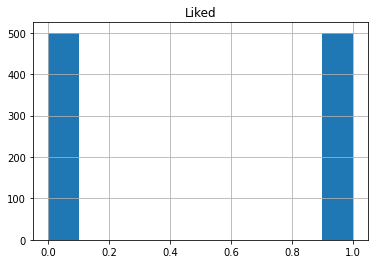

In [9]:
df.hist()


#### Data Preprocessing 

In [11]:
# Importing essential libraries for performing Natural Language Processing on 'Restaurant_Reviews.tsv' dataset
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dishaa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
df.shape

(1000, 2)

In [16]:
corpus=[]
ps=PorterStemmer()

for i in range(df.shape[0]):
    # Cleaning the data
    dialog_clean=re.sub(pattern="[^a-zA-Z]", repl=" ", string=df.Review[i])
    dialog_clean=dialog_clean.lower()
    #Tokenization of data
    dialog_split=dialog_clean.split()
    #Remove the stop words
    dialog_split=[word for word in dialog_split if word not in set(stopwords.words('english'))]
    #Stemmatization
    review = [ps.stem(word) for word in dialog_split]
    
    joined_words= " ".join(review)
    
    corpus.append(joined_words)

In [17]:
corpus[0:10]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch']

#### Creating the Bag of Words model

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, 1].values 

#### Model Building 

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [23]:
X_train.shape,y_train.shape

((800, 1500), (800,))

In [24]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [29]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1], dtype=int64)

### Accuracy Score 

In [30]:
from sklearn.metrics import accuracy_score
score1 = accuracy_score(y_test,y_pred)
print("Accuracy score is: {}%".format(round(score1*100,2)))

Accuracy score is: 76.5%


#### Hyper parameter Tuning 

In [43]:
score_list=[]
accu=0.0

for i in np.arange(0.1,1.1,0.1):
    test_classifier = MultinomialNB(alpha=i)
    test_classifier.fit(X_train, y_train)
    pred = test_classifier.predict(X_test)
    score = round(accuracy_score(y_test,pred)*100,2)
    if score>accu:
        accu=score
        print('The best accuracy is {}% with alpha value as {}'.format(accu, round(i,1)))



The best accuracy is 78.0% with alpha value as 0.1
The best accuracy is 78.5% with alpha value as 0.2


In [45]:
classifier = MultinomialNB(alpha=0.2)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.2, class_prior=None, fit_prior=True)

#### Prediction 

In [54]:
def predict_sentiment(sample_review):
  sample_review = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_review)
  sample_review = sample_review.lower()
  sample_review_words = sample_review.split()
  sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_review = [ps.stem(word) for word in sample_review_words]
  final_review = ' '.join(final_review)

  temp = cv.transform([final_review]).toarray()
  return classifier.predict(temp)[0]

In [59]:
#Prediction 

sample_review = 'The food is really good here.'

if predict_sentiment(sample_review):
  print('GOOD review!.')
else:
  print('BAD review!')

GOOD review!.


In [60]:
# Predicting values
sample_review = 'Food was pretty bad and the service was very slow.'

if predict_sentiment(sample_review):
  print('GOOD review!.')
else:
  print('BAD review!')

BAD review!


In [62]:
# Creating a pickle file for the CountVectorizer
import pickle

pickle.dump(cv, open('cv-transform.pkl', 'wb'))

In [63]:
# Creating a pickle file for the Multinomial Naive Bayes model
filename = 'restaurant-sentiment-model.pkl'
pickle.dump(classifier, open(filename, 'wb'))